# Pre Lecture

1.

Bootstrapping is a method of resampling data that is used to estimate the distribution of the dataset. Often reseampling is done by replacement, which randomly selects as many data as ones in the original dataset to form a new data set(allows repeated data). Then in the new dataset, something is calculated(such as means median), and then record the frequency of the calculated value in a histogram, repeating a large number of times, a distribution pattern will be shown. 

Standard deviation measures how wide the data spread out and Standard Error compares the difference between sample mean and population mean. 

Bootstrapping is a way of approximating the distribution, it has its own method of resampling data. SD only focus on sample and SE compares sample and population. 

https://chatgpt.com/share/66ff0168-053c-8011-8efe-41546cc5d2a6

2+3.

95% CI is created from SE by adding and subtracting(to get lower and upper bound respectively) the product of critical value for standard deviation, which is 1.96 for 95% and standard error. On the other hand, it's straightforward to calculate 95% CI from bootstrapping, simply taking the data between 2.5% and 97.5% of the bootstrap distribution

# Post Lecture

6.

1)First of all, you wanna create a bootsctrap. Let's say the original dataset contains n data, then you randomly select n data from the original, and form a new data set called bootstrap. It's okay to have repeated data in bootstrap. Next up you wanna find something to calculate, for the sake of convience, let's go with mean. So you calculate the mean of the bootstrap. Then repeat step 1 and 2 as many times as you want, but it has to be large enough, like 1000 times. Lastly, you will get an estimated histogram which represents the distribution of the original data set. 

2)The main purpose of bootstrapping is to provide an easier but fairly accurate way to determine the variability of the data as well as constructing confidence interval from that. 

3)Let's say you guess there are 70% of students at Robarts library use Macbook and the other 30% of use windows laptop. To check if this guess is plausible, you wanna go to second floor commons and start to count Macbooks and Windows, and after you collected 100 data you found out that about 65% Macbooks and 35% Windows. Next you randomly pick some data from the 100 population to get 1000 bootstrap. Lastly check if the real average(65:35) is close to the "average' in the bootstrap. 

8.

Enter the number of bootstrap samples: 10000


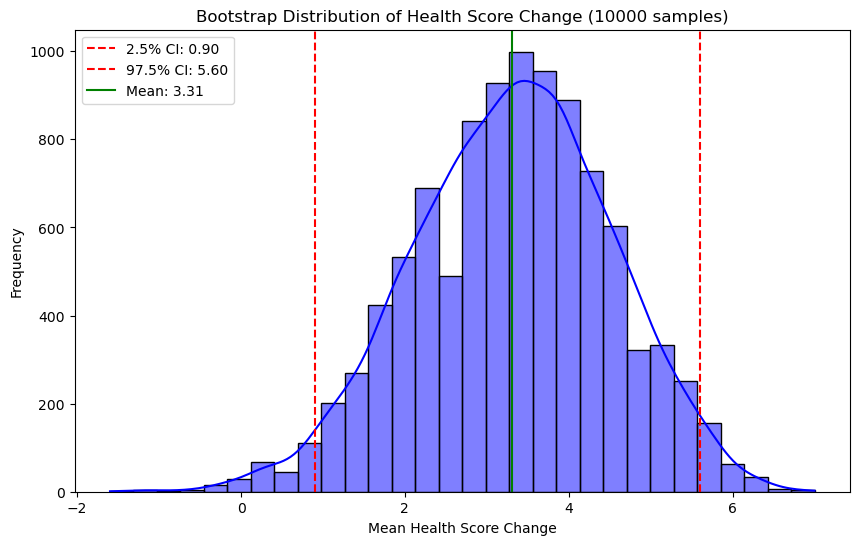

Bootstrap Mean: 3.31
95% Confidence Interval: 0.90 to 5.60


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seed for reproducibility
np.random.seed(42)

# Create the data (normally you'd read this from a CSV file)
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Load the data into a pandas DataFrame
df = pd.DataFrame(data)

# Calculate the change in health score (Final - Initial)
df['HealthChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping function
def bootstrap(data, num_bootstrap_samples=1000):
    """Perform bootstrapping on the data."""
    boot_means = []
    n = len(data)
    
    for _ in range(num_bootstrap_samples):
        # Resample the data with replacement
        sample = np.random.choice(data, size=n, replace=True)
        # Compute the mean of the sample
        boot_means.append(np.mean(sample))
    
    return np.array(boot_means)

# Specify the number of bootstrap samples (iterations)
num_bootstrap_samples = int(input("Enter the number of bootstrap samples: "))

# Perform bootstrapping on the health change data
boot_means = bootstrap(df['HealthChange'], num_bootstrap_samples=num_bootstrap_samples)

# Calculate 95% confidence interval
conf_interval = np.percentile(boot_means, [2.5, 97.5])

# Visualization of bootstrap distribution
plt.figure(figsize=(10, 6))
sns.histplot(boot_means, bins=30, kde=True, color='blue')
plt.axvline(conf_interval[0], color='red', linestyle='--', label=f'2.5% CI: {conf_interval[0]:.2f}')
plt.axvline(conf_interval[1], color='red', linestyle='--', label=f'97.5% CI: {conf_interval[1]:.2f}')
plt.axvline(np.mean(boot_means), color='green', label=f'Mean: {np.mean(boot_means):.2f}')
plt.title(f'Bootstrap Distribution of Health Score Change ({num_bootstrap_samples} samples)')
plt.xlabel('Mean Health Score Change')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Print the confidence interval and mean
print(f"Bootstrap Mean: {np.mean(boot_means):.2f}")
print(f"95% Confidence Interval: {conf_interval[0]:.2f} to {conf_interval[1]:.2f}")


https://chatgpt.com/share/66ff18b8-1bb0-8011-a646-28d7596ec422